# Import pacakges

In [1]:
from WEB import *

# Real data

### Initial value

In [2]:
PROTEIN = "6z6u"
EM_MAP = "11103"

### read data

In [3]:
web = WEB(start_radius=0, max_radius=1, gap=0.2)
data = web.read_data(
    root_map=f'./dataset/emd_{EM_MAP}.mrc', 
    root_pdb=f'./dataset/{PROTEIN}.pdb',
    atomic="CA",
    base_num_points=10, 
    max_points=1000
    )

100%|██████████| 4128/4128 [00:01<00:00, 2806.45it/s]


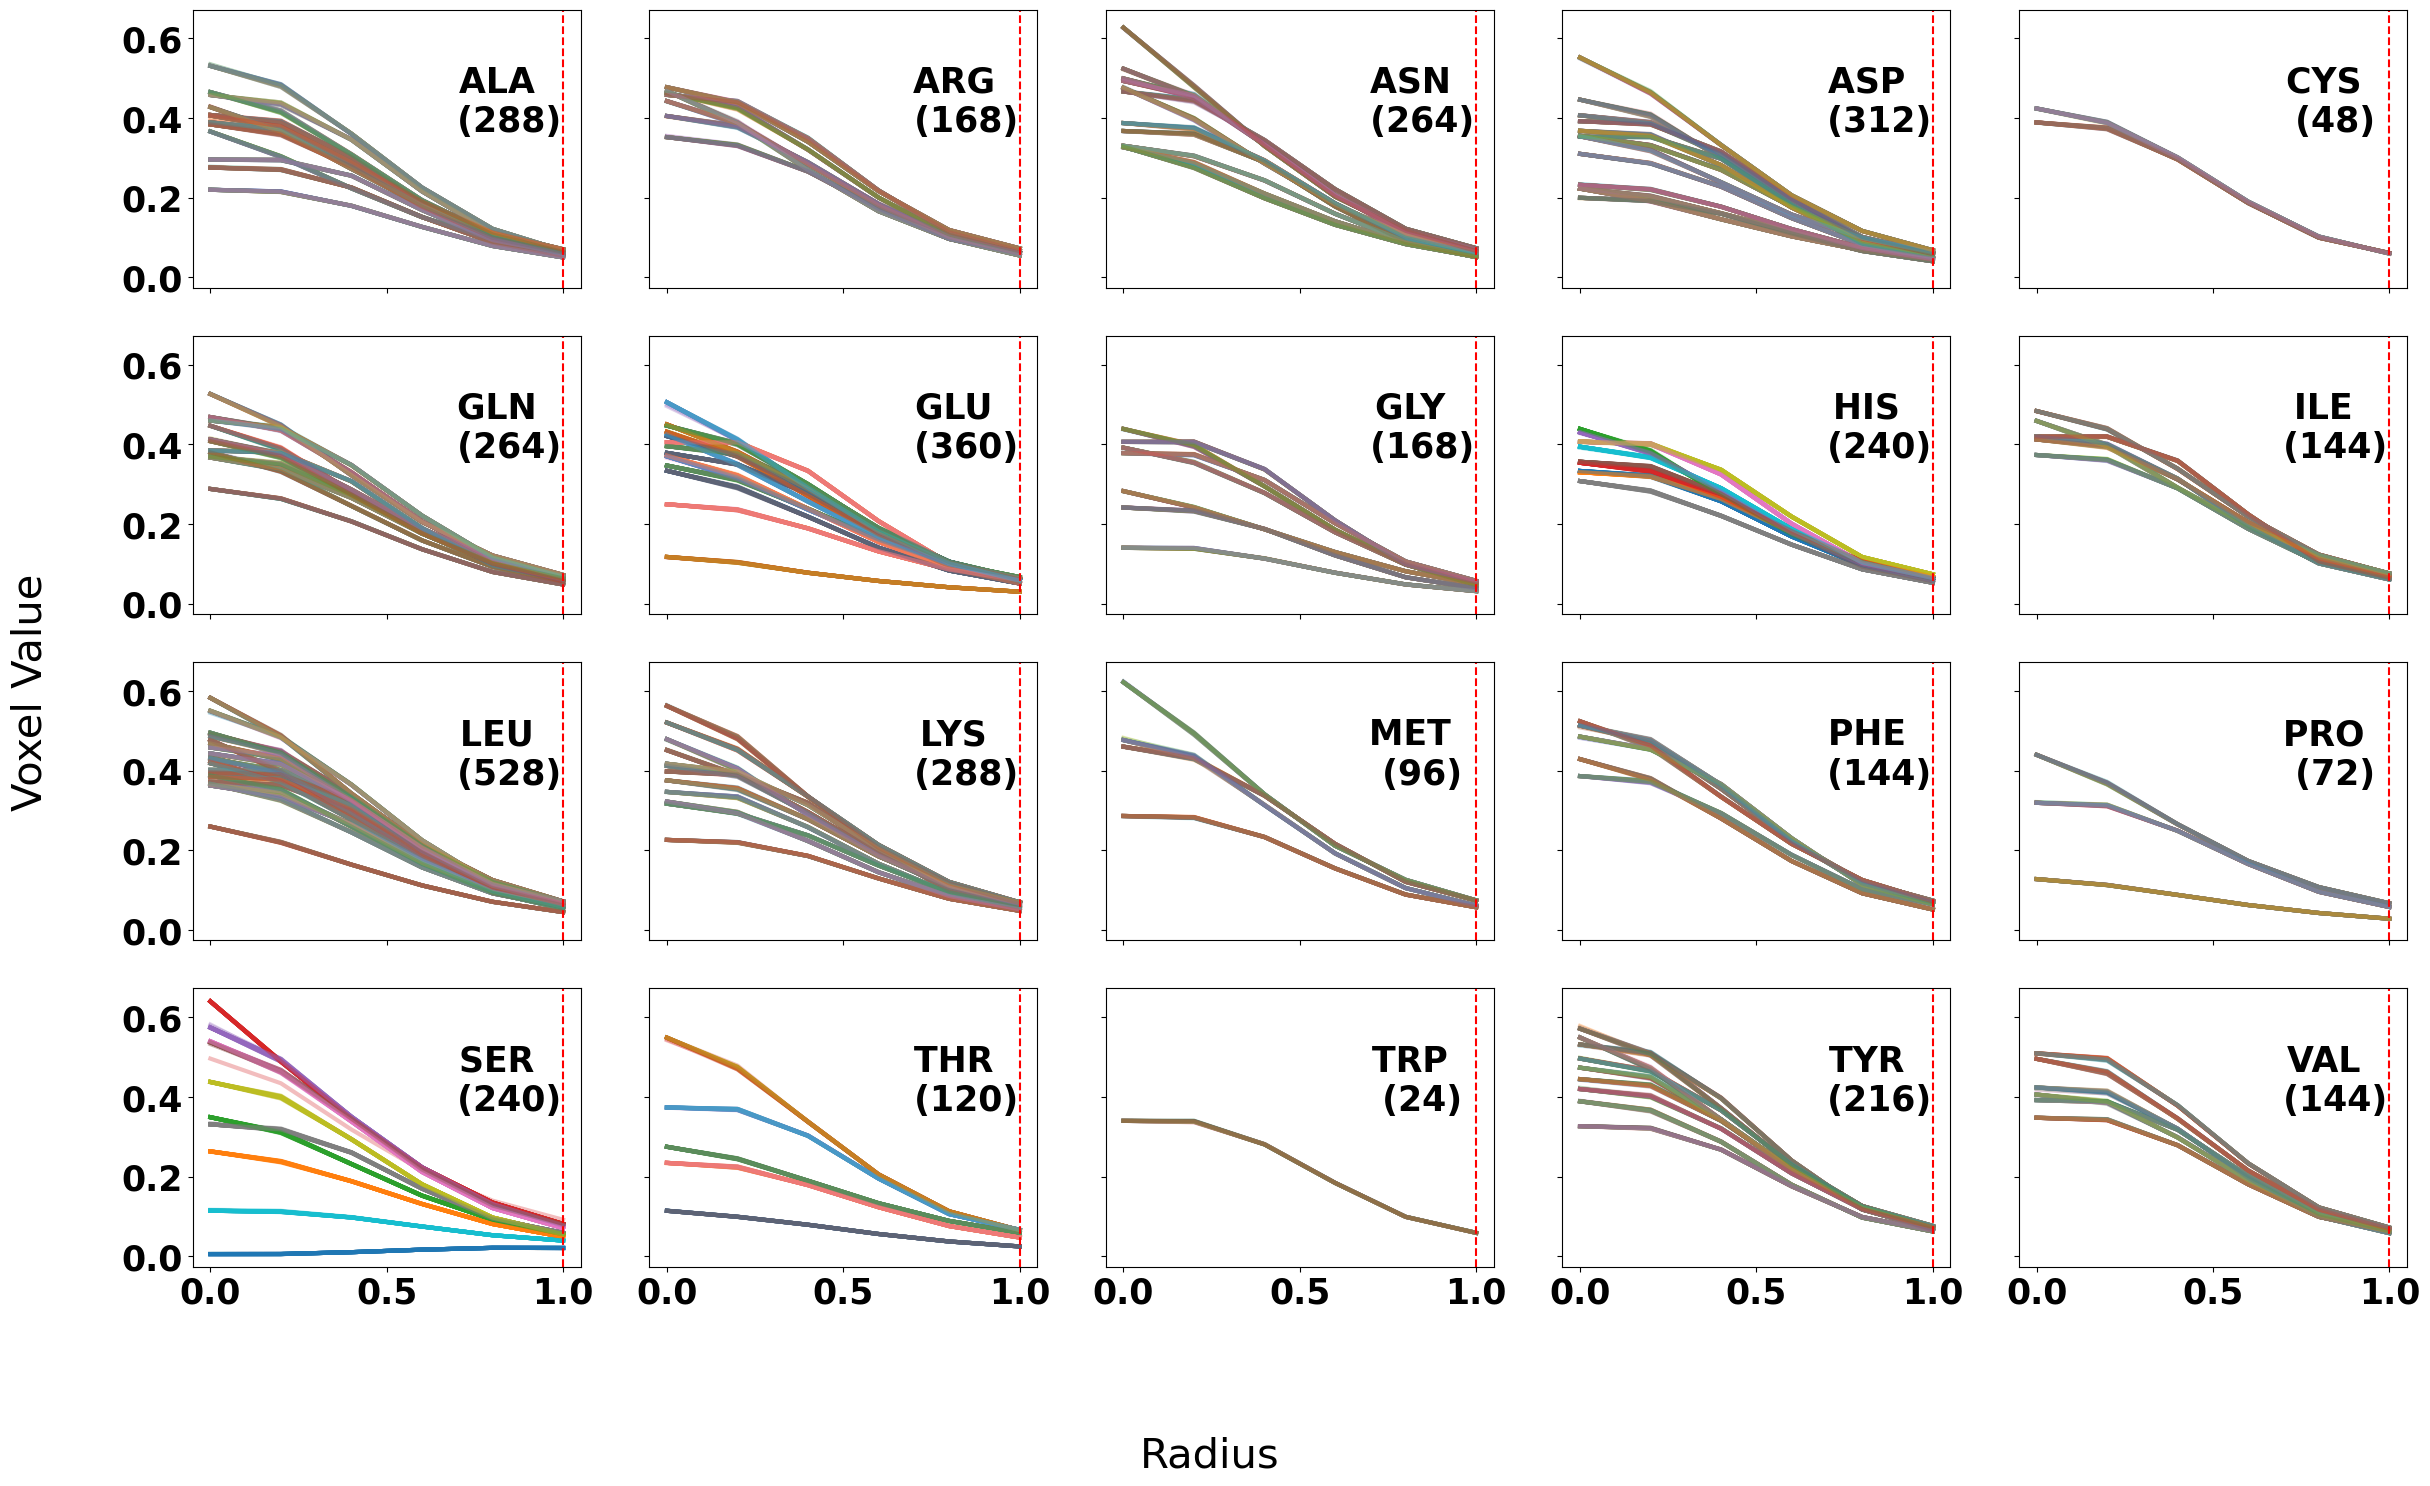

In [4]:
web.densities_plot(f"./figures/densities_plot_{PROTEIN}_{EM_MAP}")

### Fit our model

In [39]:
name = "ALA"
k = 0
alpha = 0.1

beta, sigma = web.betas_initial[name][k], web.sigmas_initial[name][k]
X_tilde, y_tilde = web.Xs_tilde[name][k], web.data_log[name][k]
resedual = y_tilde - np.dot(X_tilde, beta)
weight = np.exp(-alpha * resedual ** 2 / (2 * sigma))
np.append(np.sum(X_tilde * (resedual * weight).reshape(-1, 1), axis=0), np.sum((1 - resedual ** 2 / sigma) * weight, axis=0))

array([-2.68698647e-10,  1.02527667e-10,  8.16876877e-09])

In [7]:
resedual = y_tilde - np.dot(X_tilde, beta)
weight = np.exp(-alpha * resedual ** 2 / (2 * sigma))

NameError: name 'y_tilde' is not defined

In [35]:
np.sum(X_tilde * (resedual * weight).reshape(-1, 1), axis=0)

array([-2.68698647e-10,  1.02527667e-10])

In [33]:
np.sum((1 - resedual ** 2 / sigma) * weight, axis=0)

8.168768772520707e-09

In [6]:
ans1, ans2 = [], []
j = 0
for X_tilde, y_tilde in zip(web.Xs_tilde[name][j], web.data_log[name][j]):
    resedual = y_tilde - np.dot(X_tilde, beta)
    weight = np.exp(-alpha * resedual ** 2 / (2 * sigma))
    ans1.append(X_tilde * resedual * weight)
    ans2.append((1 - resedual ** 2 / sigma) * weight)
ans = np.append(np.sum(ans1, axis=0), np.sum(ans2, axis=0))

NameError: name 'name' is not defined

In [38]:
ans

array([-2.68698647e-10,  1.02524114e-10,  8.16876877e-09])

In [4]:
_ = web.paramters_initial()
betas_WEB_o, _ = web.WEB_iter(max_iter=20, alpha=0.1, gamma=0.1, tol=1e-5)
betas_WEB_o["GLN"]

100%|██████████| 20/20 [00:03<00:00,  5.08it/s]


array([[-1.05163856,  4.46273511],
       [-0.94779178,  4.47917348],
       [-1.22877818,  4.27397258],
       [-0.81843118,  4.38725908],
       [-0.90939125,  4.27306945],
       [-0.81148471,  4.32030603],
       [-0.76438475,  4.42582278],
       [-0.89316834,  4.78167545],
       [-0.99052705,  4.19191815],
       [-0.98071631,  4.28483146],
       [-0.96827413,  4.4137741 ],
       [-1.05079942,  4.44319993],
       [-0.94818419,  4.48673843],
       [-1.22901815,  4.26766843],
       [-0.81664478,  4.40668587],
       [-0.90804174,  4.26957646],
       [-0.81074947,  4.32486795],
       [-0.76648918,  4.39204694],
       [-0.89639672,  4.77477367],
       [-0.98673937,  4.19123678],
       [-0.97620108,  4.29124143],
       [-0.96703615,  4.39562818],
       [-1.05115712,  4.45615028],
       [-0.94686527,  4.49274556],
       [-1.22788617,  4.26485897],
       [-0.81645209,  4.39496945],
       [-0.9091301 ,  4.26374096],
       [-0.81159556,  4.29690626],
       [-0.7664104 ,

In [5]:
web.sigmas_median["GLN"]

array([0.08991663, 0.11118203, 0.13971669, 0.09030436, 0.14250675,
       0.10120389, 0.09194655, 0.1439732 , 0.13617743, 0.14017597,
       0.07089483, 0.09252381, 0.10537107, 0.1363405 , 0.09199711,
       0.13655324, 0.100046  , 0.08666272, 0.14655563, 0.11639412,
       0.12180912, 0.07064923, 0.09185739, 0.10576715, 0.13439284,
       0.08794153, 0.13057025, 0.10052929, 0.09227792, 0.14082489,
       0.124868  , 0.13111833, 0.06191652, 0.09327023, 0.10471442,
       0.14515504, 0.09744458, 0.12221146, 0.09761808, 0.1028292 ,
       0.14441153, 0.12309873, 0.12845446, 0.06460009, 0.09027679,
       0.10664325, 0.14223688, 0.094235  , 0.1454322 , 0.10763301,
       0.09449892, 0.13567209, 0.12914218, 0.12824637, 0.0699934 ,
       0.10161015, 0.10663476, 0.13699892, 0.08500186, 0.13903952,
       0.12243033, 0.08683914, 0.15830556, 0.12839719, 0.12737241,
       0.06622781, 0.10118482, 0.11302784, 0.13744691, 0.09448092,
       0.13109578, 0.09543984, 0.09510952, 0.14748587, 0.12379

In [4]:
_ = web.paramters_initial()
betas_WEB = web.WEB_iter_test2(max_iter=20, alpha=0.1, gamma=0.1, tol=1e-5)

100%|██████████| 20/20 [00:02<00:00,  8.86it/s]


In [7]:
web.betas_WEB["GLN"]

array([[-1.04189698,  4.51523398],
       [-0.9259893 ,  4.59252141],
       [-1.24064266,  4.32546924],
       [-0.79351122,  4.58299344],
       [-0.91885758,  4.32888643],
       [-0.78539568,  4.48642062],
       [-0.73276997,  4.60145907],
       [-0.835853  ,  5.02830322],
       [-0.98912539,  4.31174777],
       [-0.98755679,  4.31293692],
       [-0.97385012,  4.33278093],
       [-1.03971267,  4.52501617],
       [-0.92531508,  4.60769343],
       [-1.2398627 ,  4.32956753],
       [-0.7944221 ,  4.58517988],
       [-0.92076094,  4.31584561],
       [-0.78324038,  4.49403511],
       [-0.73696031,  4.57787165],
       [-0.85271101,  4.93900987],
       [-0.99232659,  4.29688034],
       [-0.99441763,  4.26275401],
       [-0.97895749,  4.29609684],
       [-1.0404257 ,  4.5238678 ],
       [-0.92577915,  4.59348774],
       [-1.23926343,  4.32915851],
       [-0.79171989,  4.60384172],
       [-0.91641858,  4.35161824],
       [-0.78257764,  4.49629008],
       [-0.74602992,

In [7]:
sum(web.weights["ALA"][0])

512.9092120168144

In [8]:
web.sigmas_WEB["GLN"]

array([0.43547966, 0.4129684 , 0.46131707, 0.49203572, 0.52802558,
       0.50117974, 0.43456609, 0.59434666, 0.46550015, 0.45505729,
       0.30382442, 0.45258196, 0.42140935, 0.46704766, 0.48458316,
       0.52405994, 0.48939599, 0.43509454, 0.54837676, 0.46476526,
       0.43348333, 0.30818268, 0.44191952, 0.40531498, 0.46599905,
       0.50567479, 0.55366047, 0.50463458, 0.40379173, 0.56081633,
       0.45034812, 0.44178905, 0.3122641 , 0.45164112, 0.40522828,
       0.48028128, 0.50168347, 0.54041963, 0.45938246, 0.43355707,
       0.56066738, 0.46915995, 0.46066149, 0.31073929, 0.46159599,
       0.41676667, 0.44000918, 0.50350004, 0.54736275, 0.4649467 ,
       0.43467372, 0.55596913, 0.45877707, 0.44736733, 0.31627268,
       0.44423595, 0.42900181, 0.46416175, 0.47793728, 0.52665465,
       0.45923853, 0.41717837, 0.55994562, 0.46752989, 0.4318711 ,
       0.33043282, 0.4589984 , 0.40726059, 0.46563532, 0.49054123,
       0.54838355, 0.45688041, 0.40677121, 0.59866638, 0.48362

### Plot results

<Figure size 640x480 with 0 Axes>

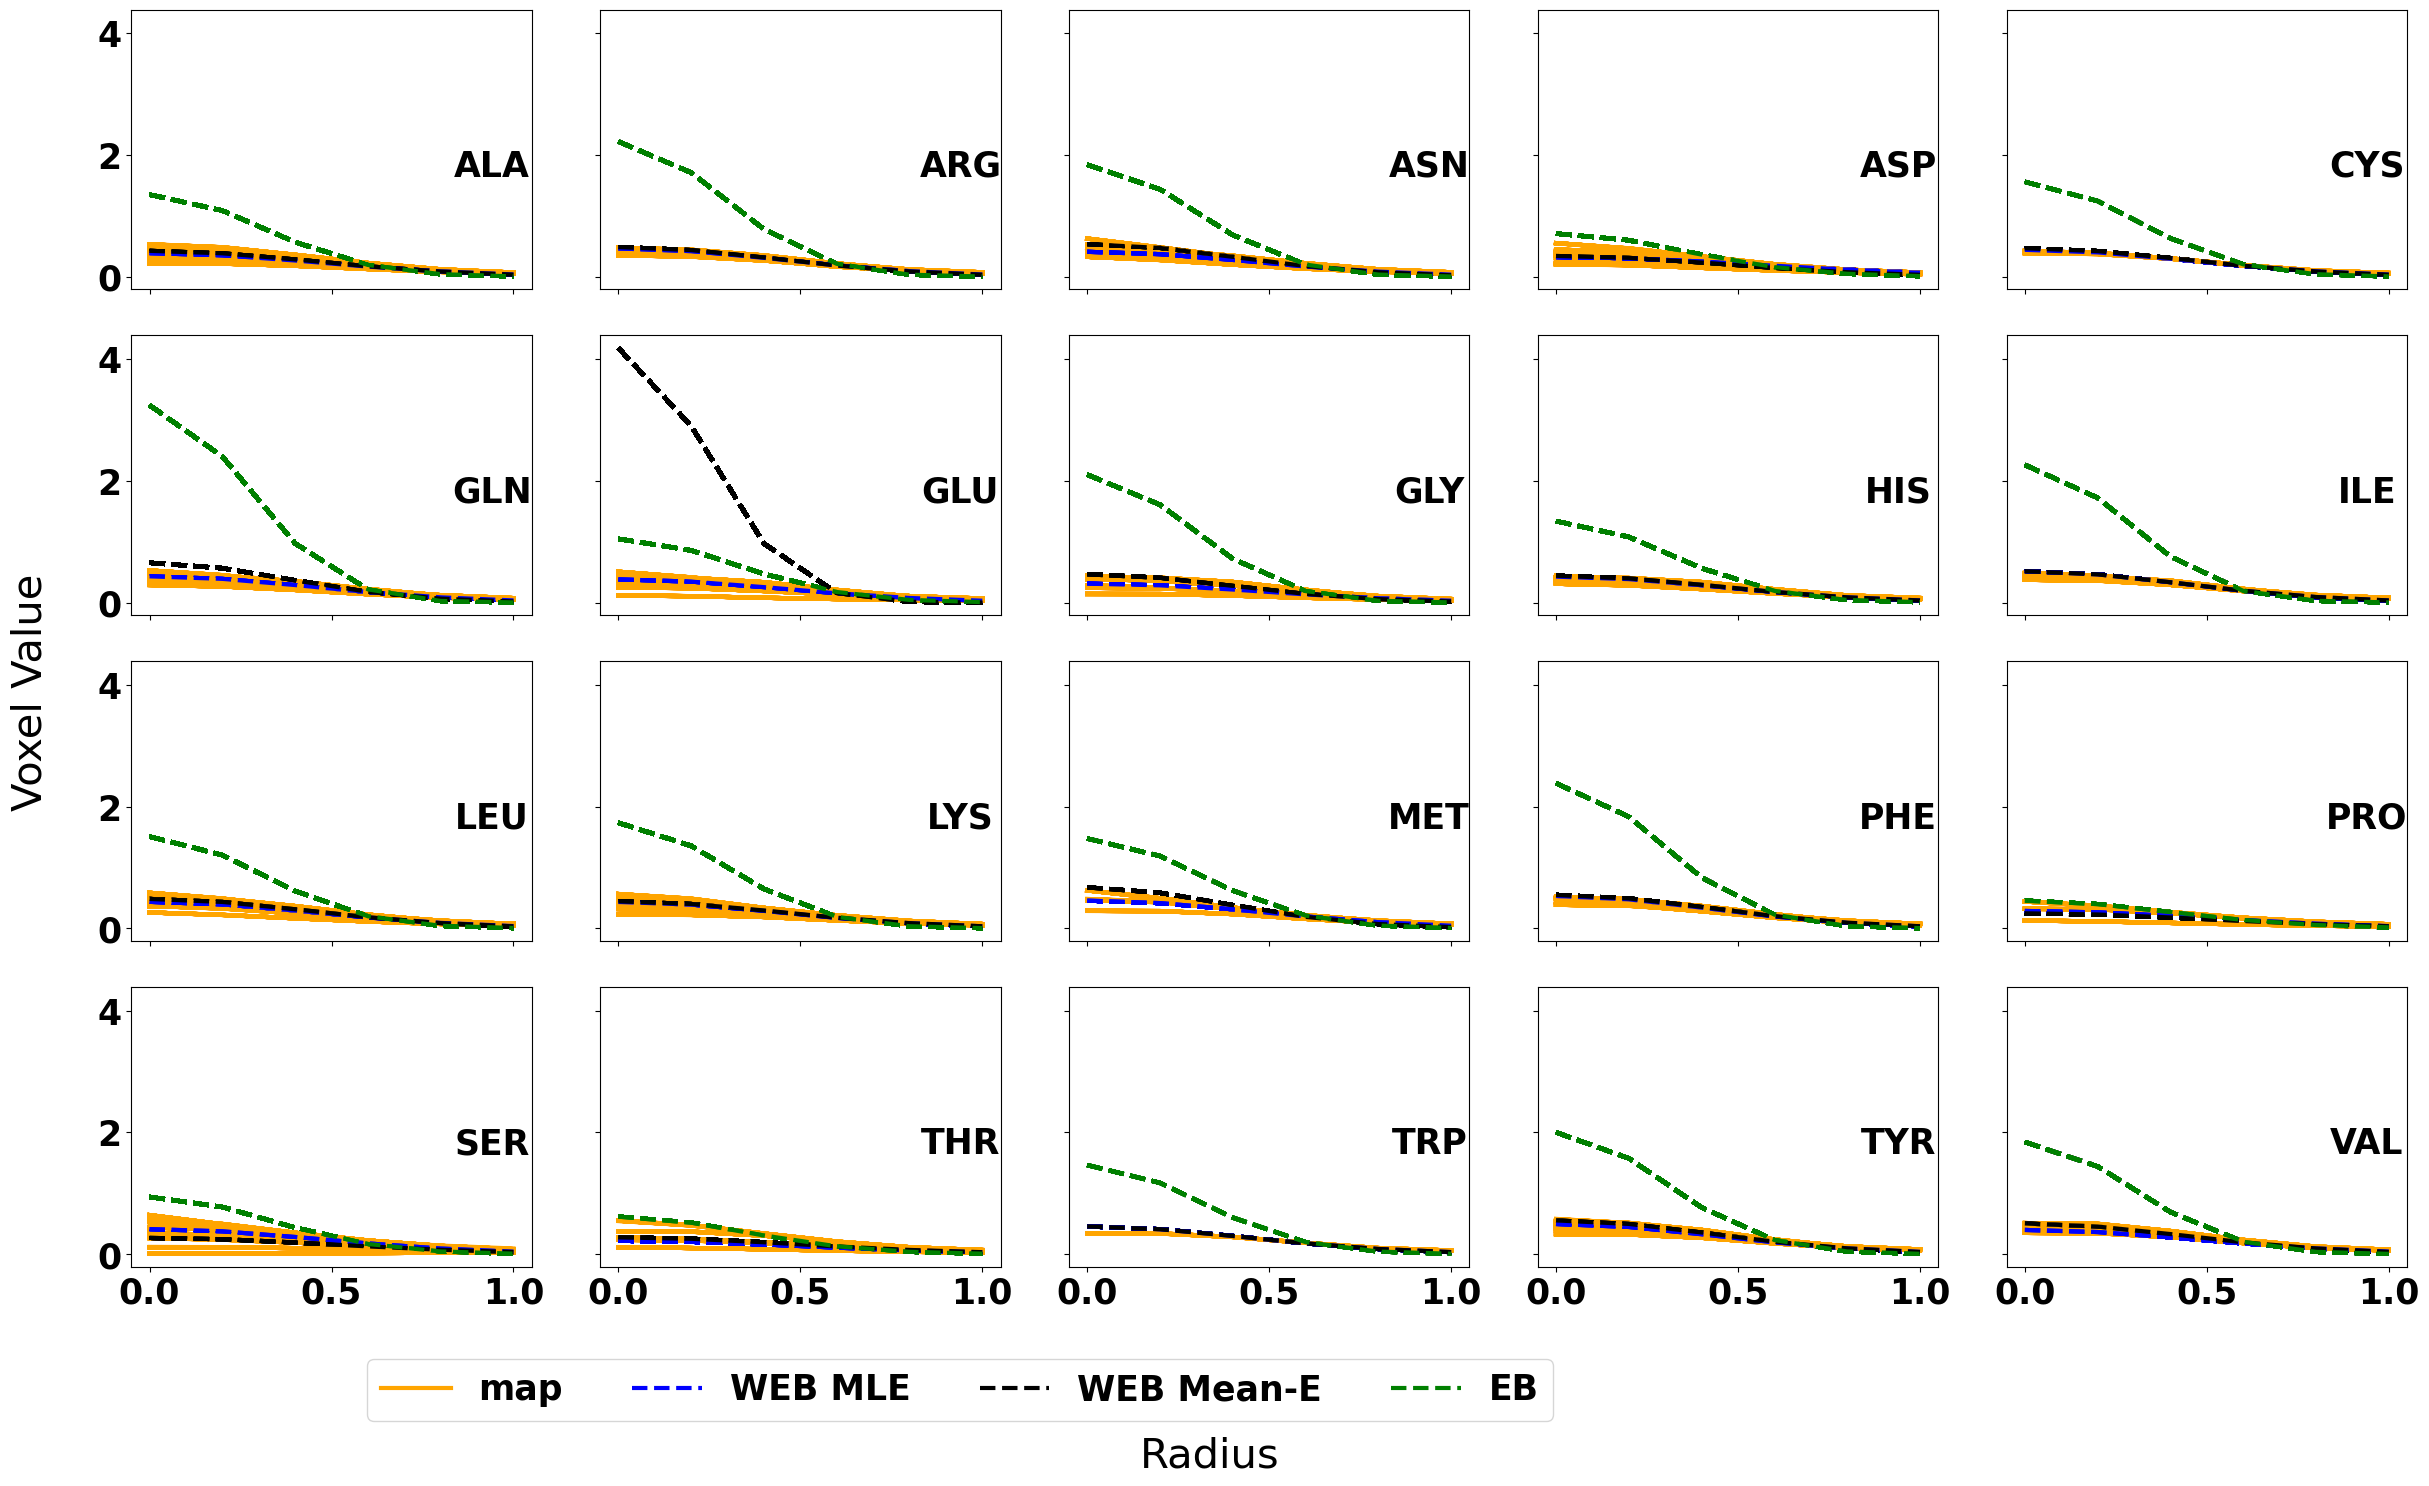

In [12]:
web.representative_densities_plot(
    # root = f"./figures/densities_compared_{PROTEIN}_{EM_MAP}_EB", 
    estimators = ["WEB MLE", "WEB Mean-E", "EB"]
    )

In [8]:
def func(theta, X_tilde, y_tilde, alpha):
    beta, sigma = theta[:2], theta[2]
    resedual = y_tilde - np.dot(X_tilde, beta)
    weight = np.exp(-alpha * resedual ** 2 / (2 * sigma))
    ans1 = np.sum(X_tilde * (resedual * weight).reshape(-1, 1), axis=0)
    ans2 = np.sum((1 - resedual ** 2 / sigma) * weight, axis=0) - alpha / (1 + alpha) ** (3 / 2)
    return np.append(ans1, ans2) 

In [9]:
name = "ALA"
j = 0
X_tilde, y_tilde = web.Xs_tilde[name][j], web.data_log[name][j]
beta, sigma = web.betas_WLR[name][j], web.sigmas_WEB[name][j]
alpha = 0.1

In [10]:
func(np.append(beta, sigma), X_tilde, y_tilde, alpha)

array([ 0.00171886, -0.00079387,  0.00156305])

In [11]:
alpha = 0.1
alpha / ((1 + alpha) ** (3/2))

0.08667841720414475

<Figure size 640x480 with 0 Axes>

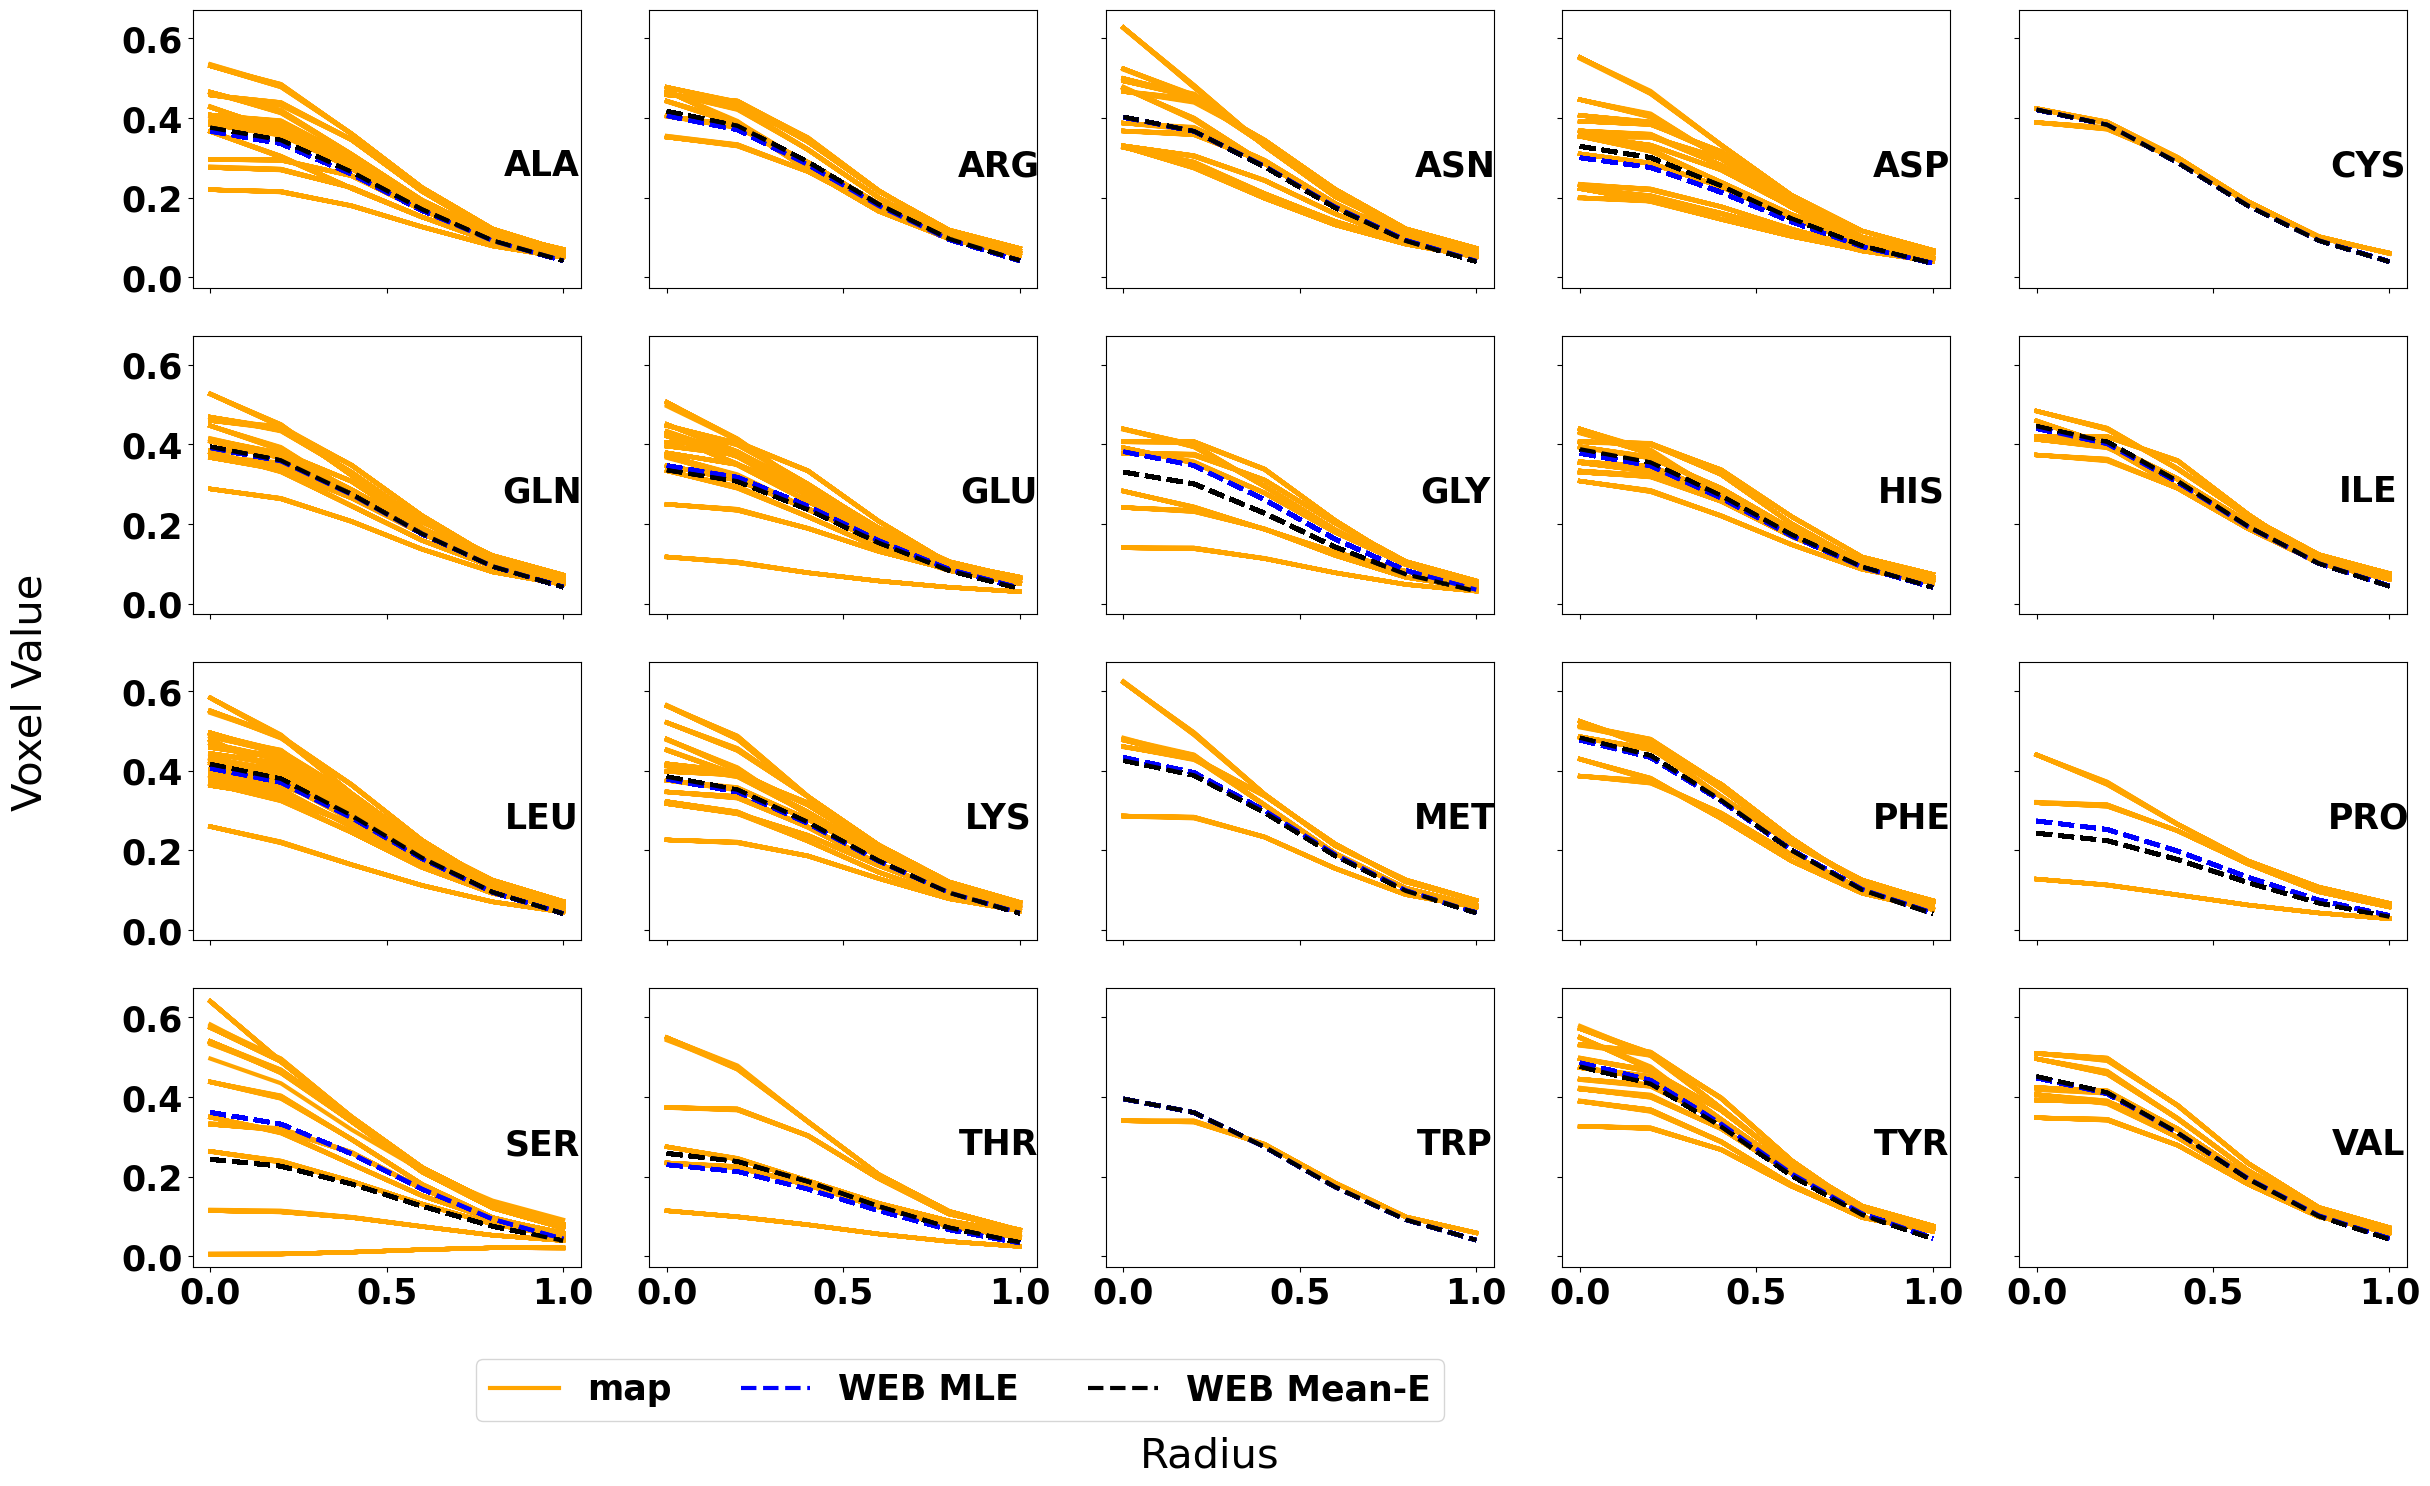

In [12]:
web.representative_densities_plot(
    estimators = ["WEB MLE", "WEB Mean-E"]
    )

<Figure size 640x480 with 0 Axes>

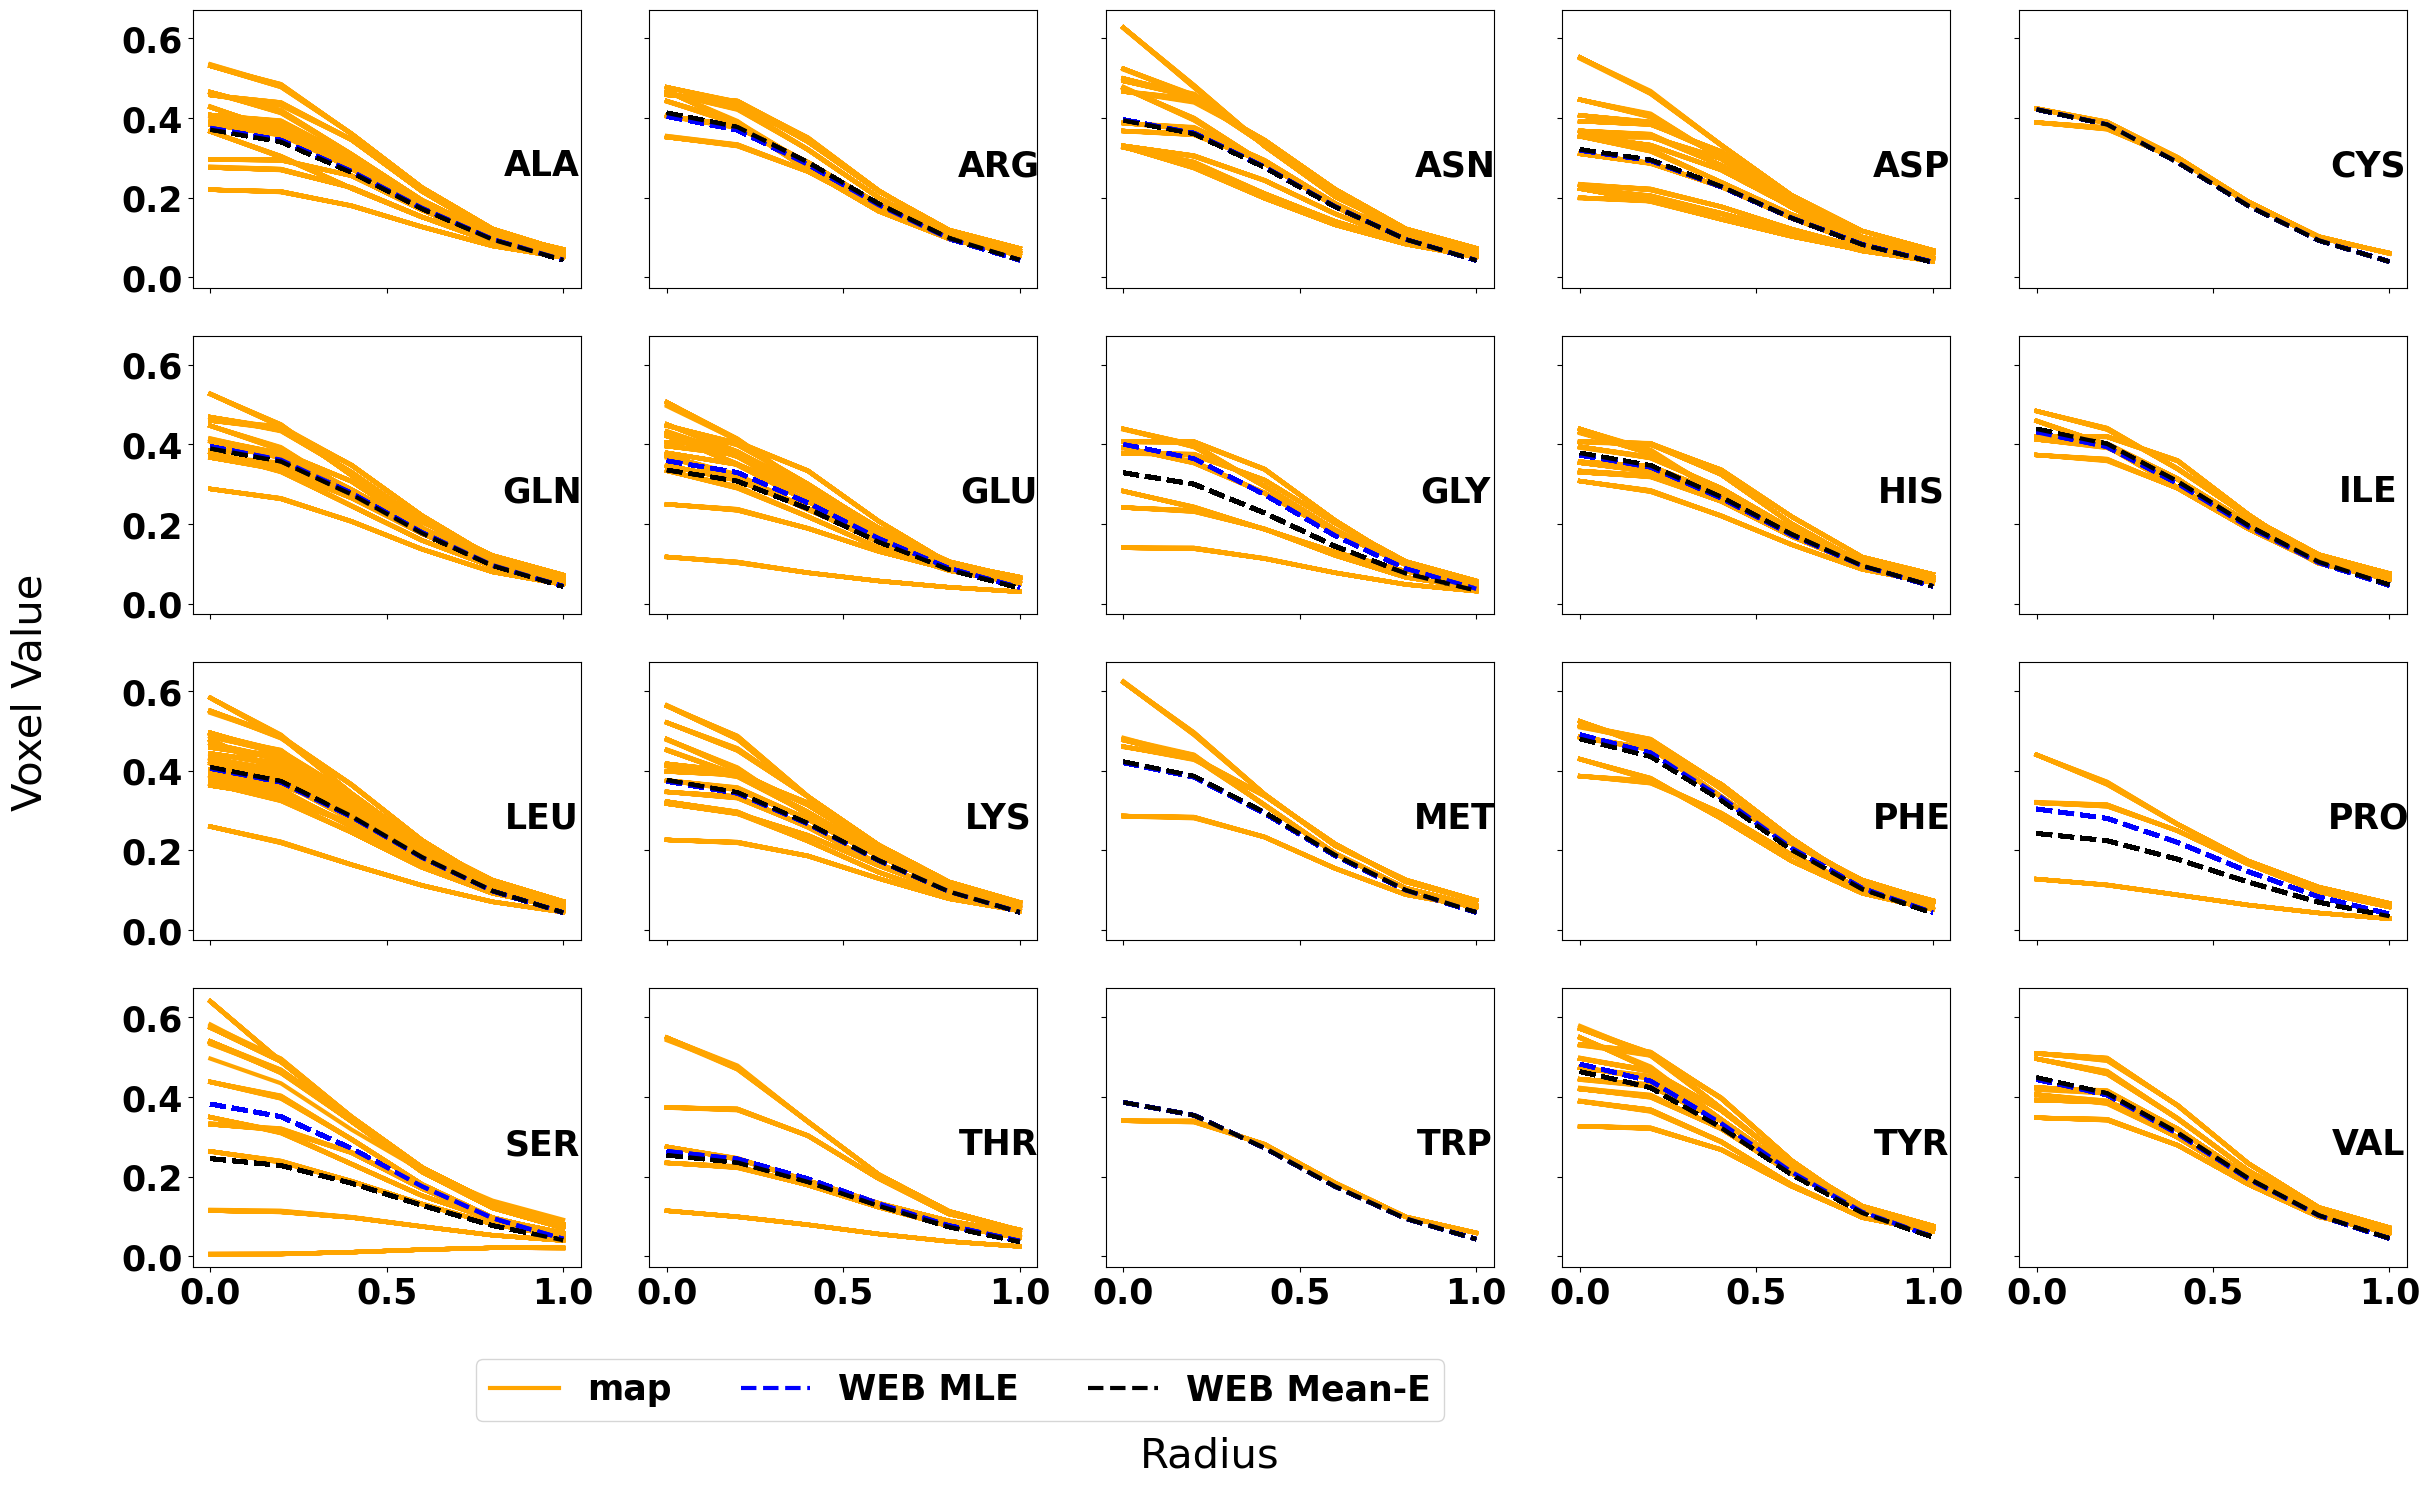

In [7]:
web.representative_densities_plot(
    root = f"./figures/densities_compared_{PROTEIN}_{EM_MAP}", 
    estimators = ["WEB MLE", "WEB Mean-E"]
    )

### Find outliers

In [14]:
outliers, statistic_distances = web.find_outliers()

In [15]:
web.sigmas_WEB["ALA"]

array([0.66432954, 0.3813903 , 0.48870999, 0.4647743 , 0.45736029,
       0.45929835, 0.59244802, 0.3923424 , 0.48329022, 0.3715273 ,
       0.3161519 , 0.43360001, 0.6879843 , 0.39019495, 0.51027887,
       0.48976307, 0.48027132, 0.45657471, 0.6148248 , 0.37766393,
       0.48200387, 0.3768013 , 0.34661568, 0.4396949 , 0.67224252,
       0.40103557, 0.50087837, 0.48560557, 0.43531042, 0.45500437,
       0.62979449, 0.38909494, 0.50378107, 0.39665012, 0.34247591,
       0.4423163 , 0.64647048, 0.39106052, 0.50350656, 0.47828928,
       0.45739702, 0.45143121, 0.65073366, 0.38904344, 0.50181433,
       0.40487864, 0.33224061, 0.44371842, 0.677153  , 0.38699092,
       0.48630954, 0.51375642, 0.46548361, 0.43470165, 0.61488933,
       0.38010144, 0.52157369, 0.37839431, 0.33760165, 0.45263026,
       0.67107799, 0.37700764, 0.48668254, 0.49812328, 0.47151174,
       0.41523182, 0.61477191, 0.37874313, 0.49305314, 0.38576661,
       0.32637081, 0.447853  , 0.64873976, 0.38429662, 0.50555

In [14]:
web.sigmas

{'ALA': array([[0.02382649, 0.02046245],
        [0.02046245, 0.03014506]]),
 'ARG': array([[0.00046169, 0.00091151],
        [0.00091151, 0.00250028]]),
 'ASN': array([[0.00745925, 0.01040399],
        [0.01040399, 0.01794434]]),
 'ASP': array([[0.05198591, 0.05982106],
        [0.05982106, 0.10323844]]),
 'CYS': array([[3.87694715e-05, 3.91168063e-04],
        [3.91168063e-04, 4.81564255e-03]]),
 'GLN': array([[0.00077136, 0.00185143],
        [0.00185143, 0.00640913]]),
 'GLU': array([[0.03924021, 0.04351125],
        [0.04351125, 0.06564143]]),
 'GLY': array([[0.0563216 , 0.03446943],
        [0.03446943, 0.03307617]]),
 'HIS': array([[0.00230127, 0.00566004],
        [0.00566004, 0.01555446]]),
 'ILE': array([[0.00074198, 0.00428176],
        [0.00428176, 0.02483021]]),
 'LEU': array([[0.0072195 , 0.00307635],
        [0.00307635, 0.02367424]]),
 'LYS': array([[7.36245876e-05, 2.49479916e-04],
        [2.49479916e-04, 1.56296322e-03]]),
 'MET': array([[0.01980046, 0.00816021],
   

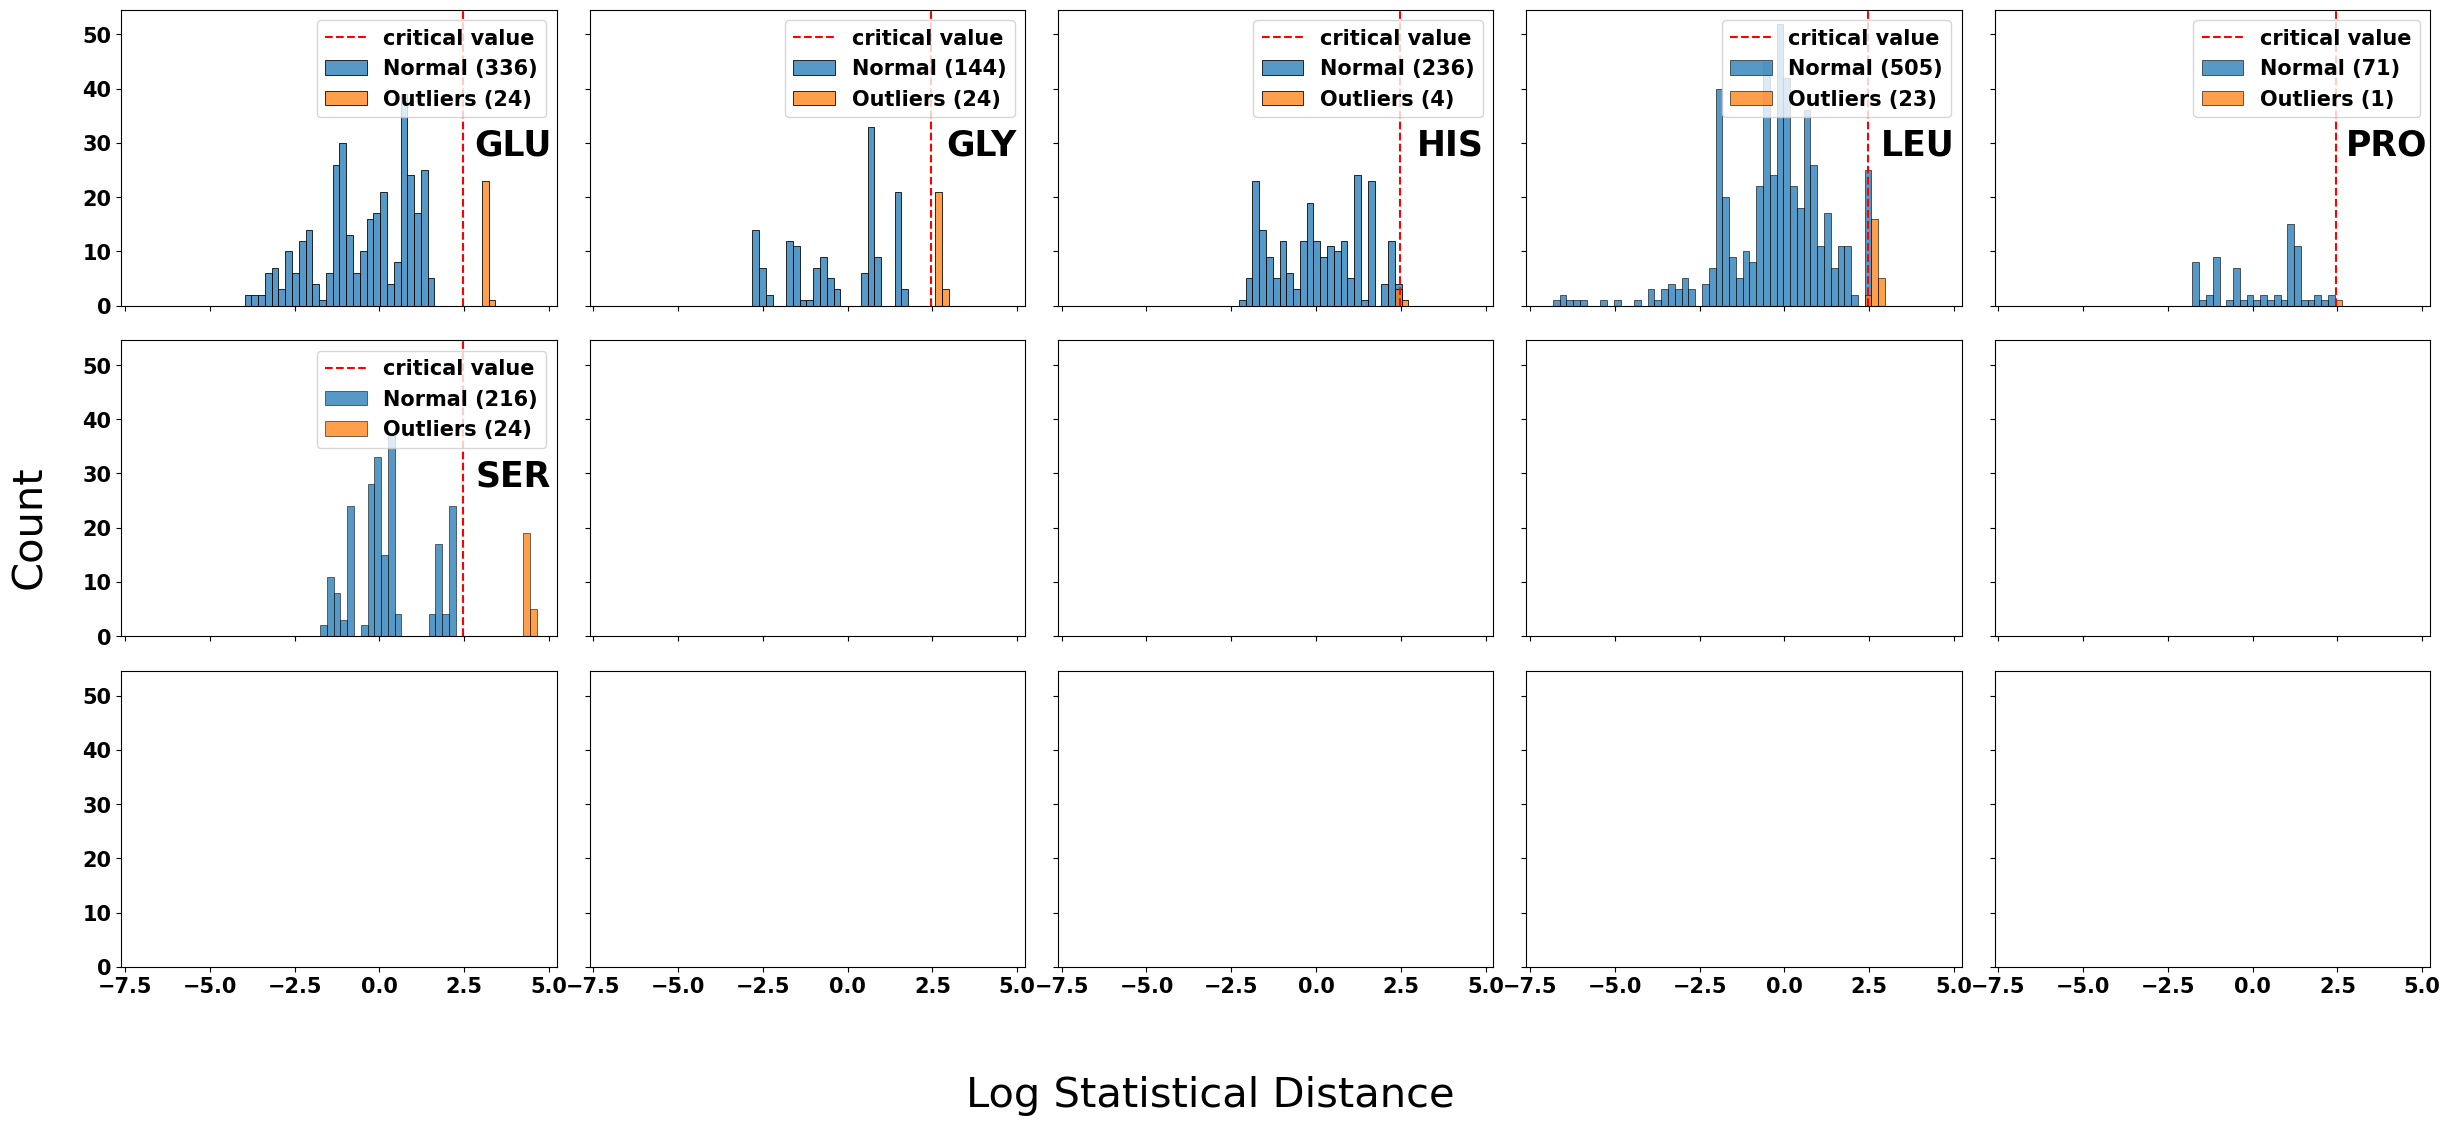

In [15]:
web.distances_hist()

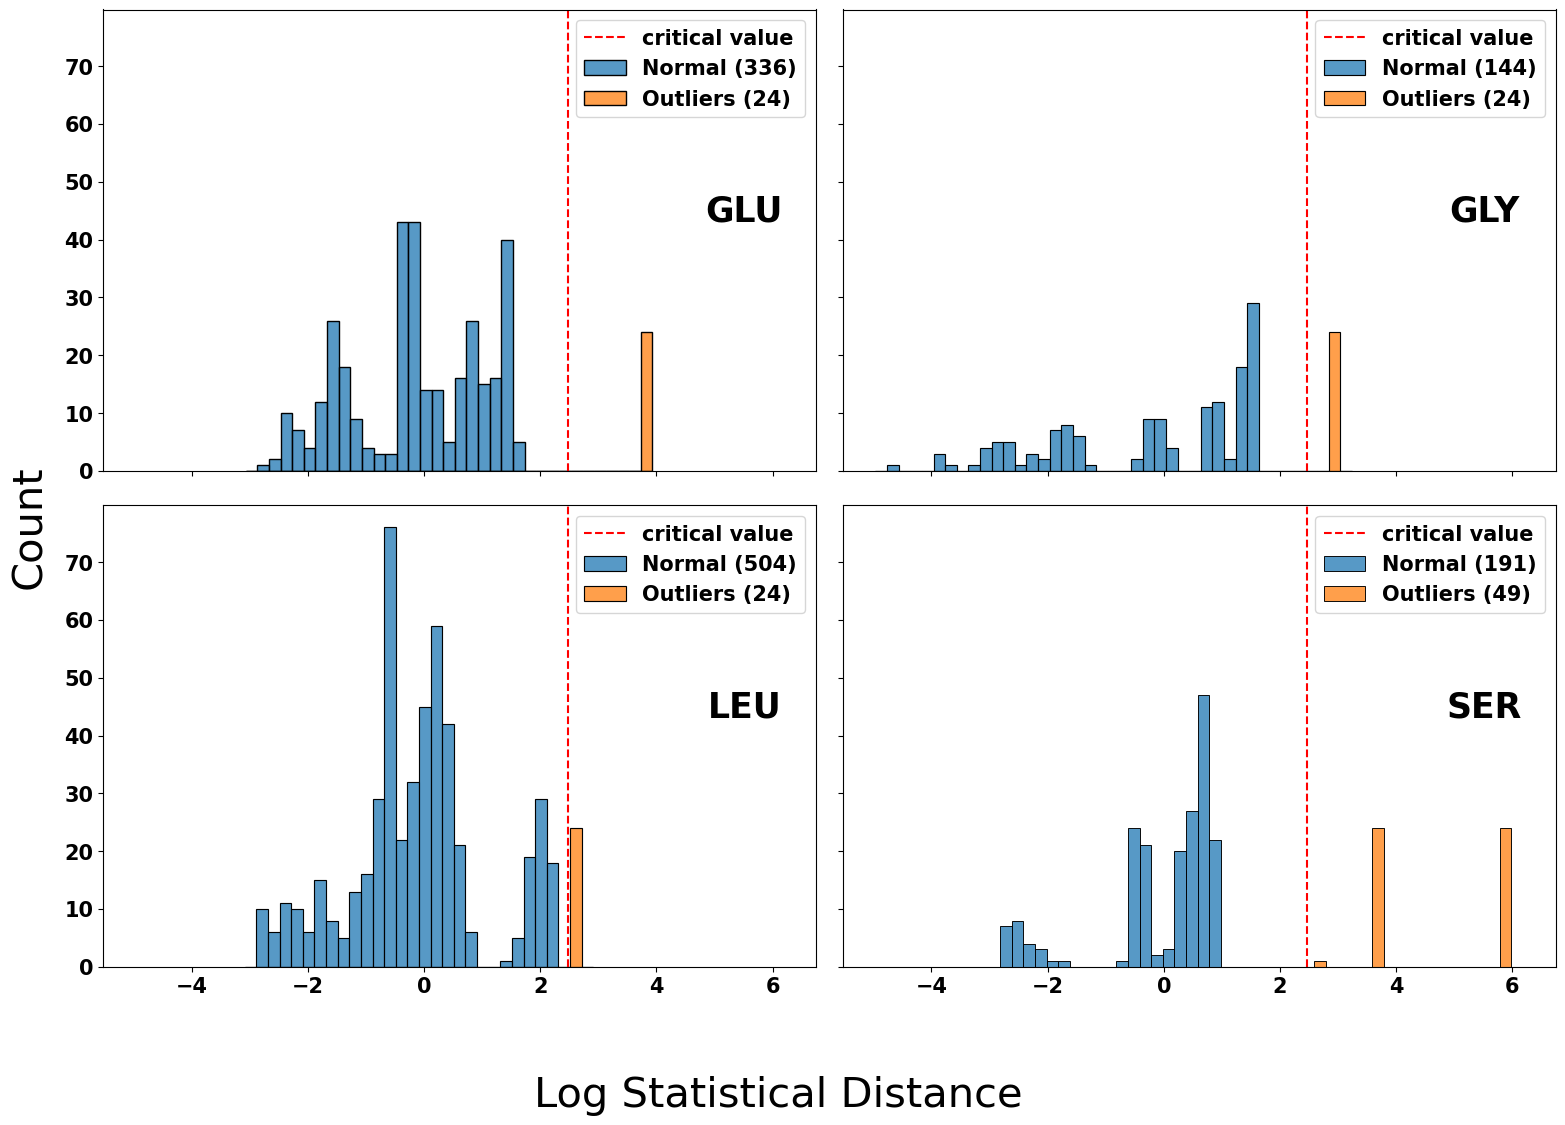

In [9]:
web.distances_hist(f"./figures/distances_hist_{PROTEIN}_{EM_MAP}")

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 640x480 with 0 Axes>

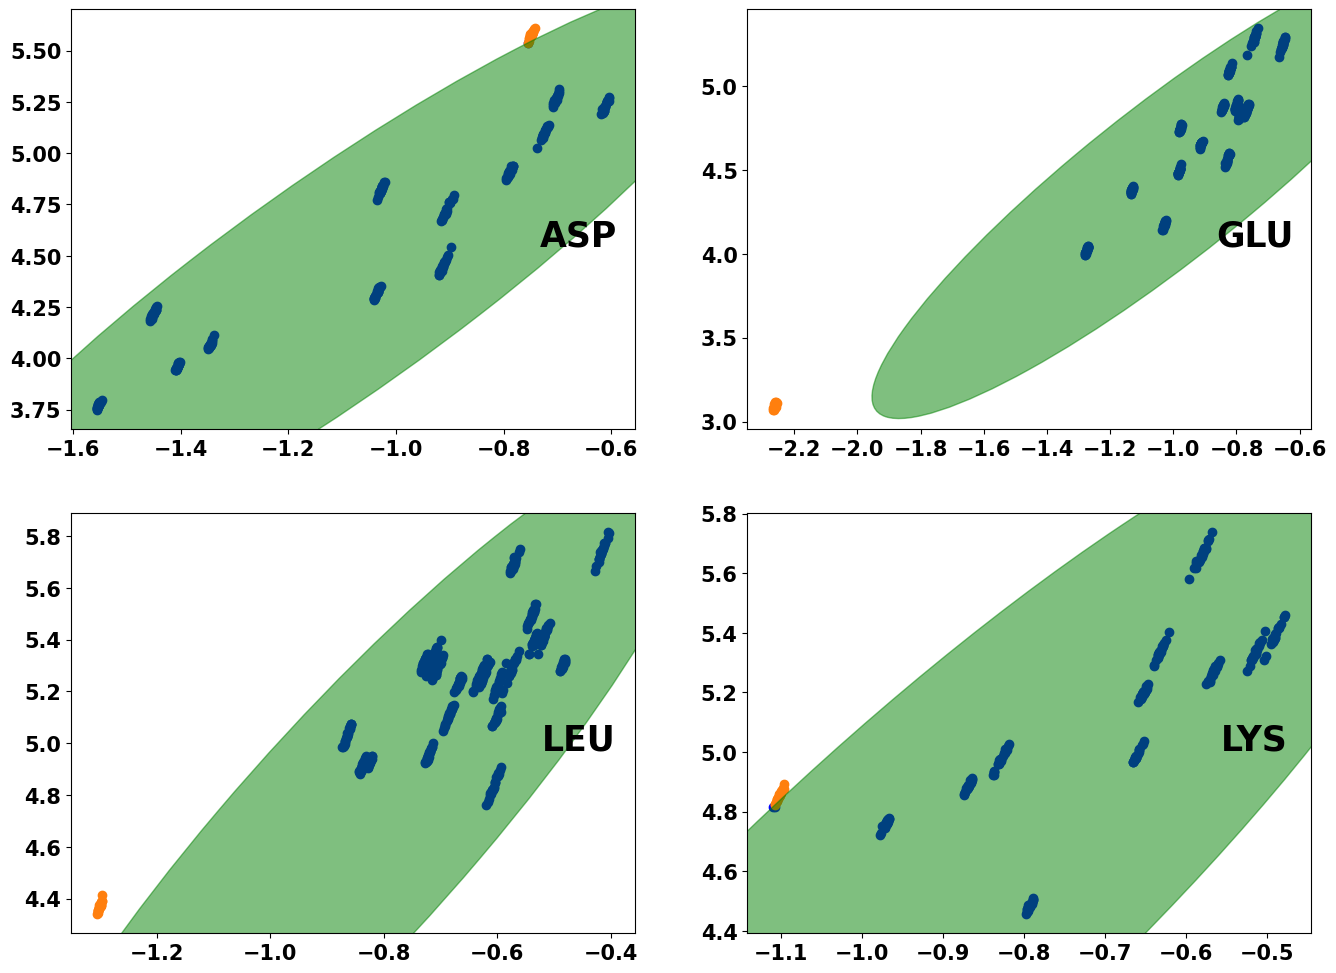

In [12]:
web.confidence_regions_plot(f"./figures/confidence_regions_plot_{PROTEIN}_{EM_MAP}")

<Figure size 640x480 with 0 Axes>

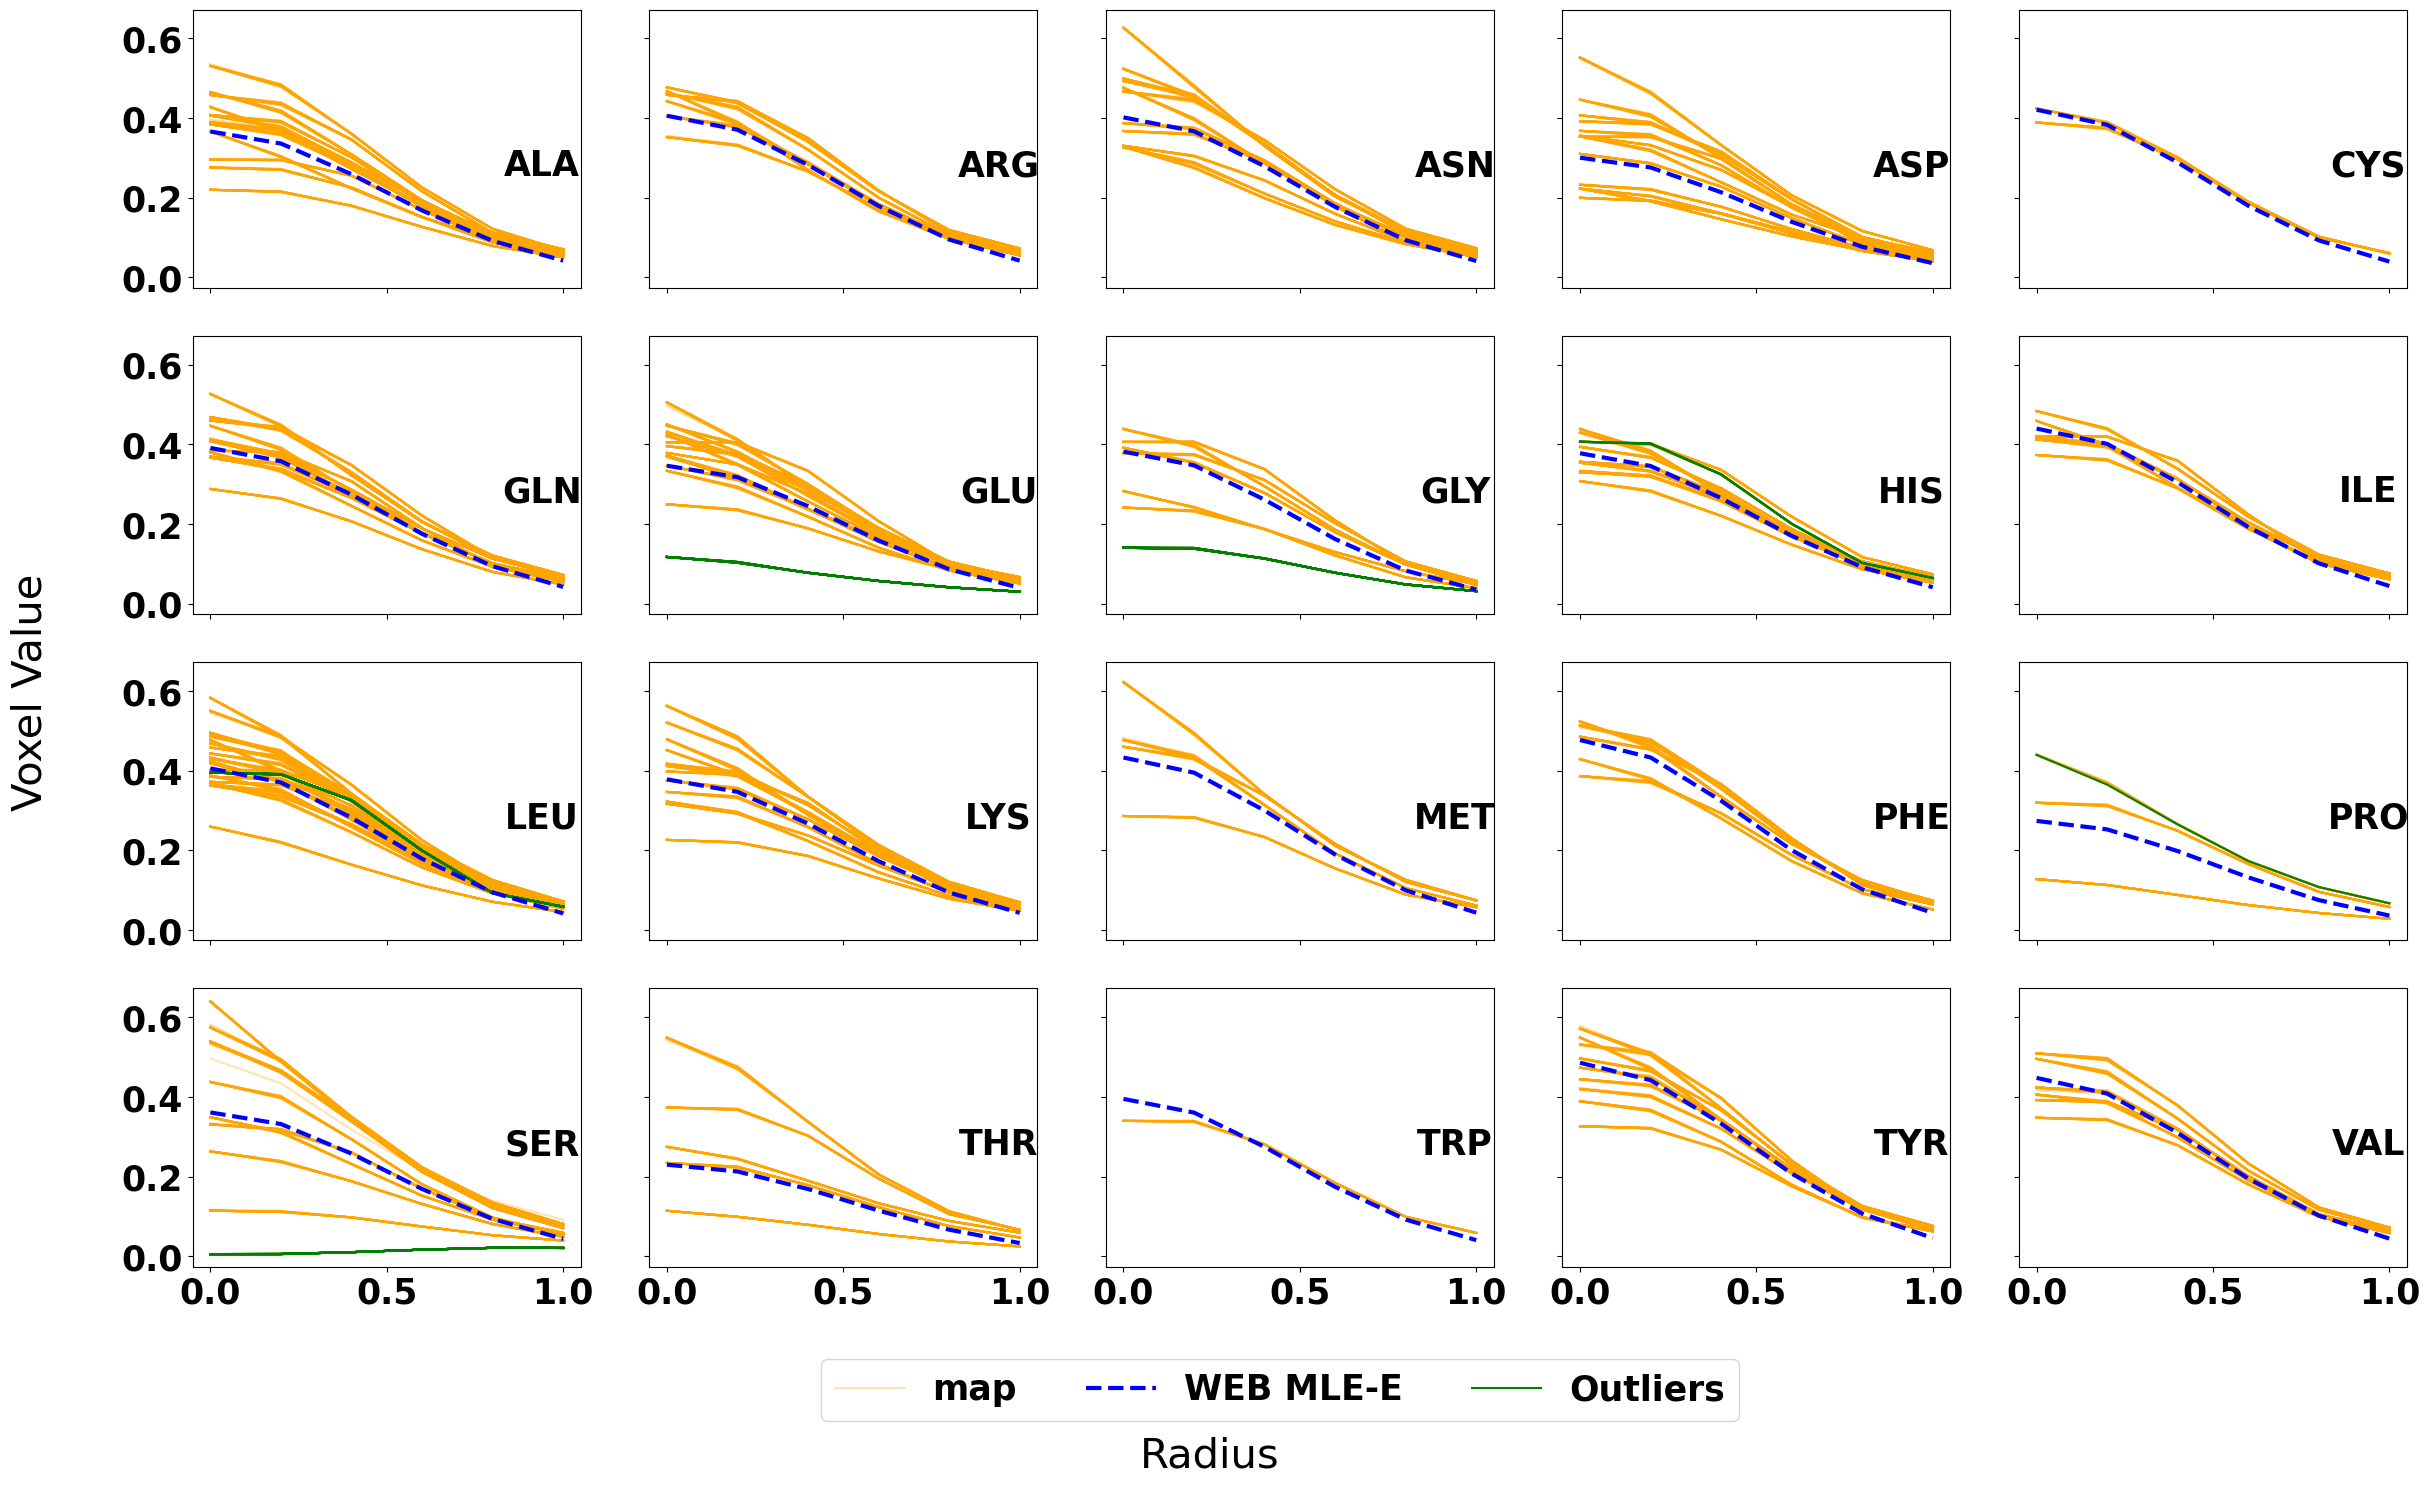

In [16]:
web.outliers_density_plot()

<Figure size 640x480 with 0 Axes>

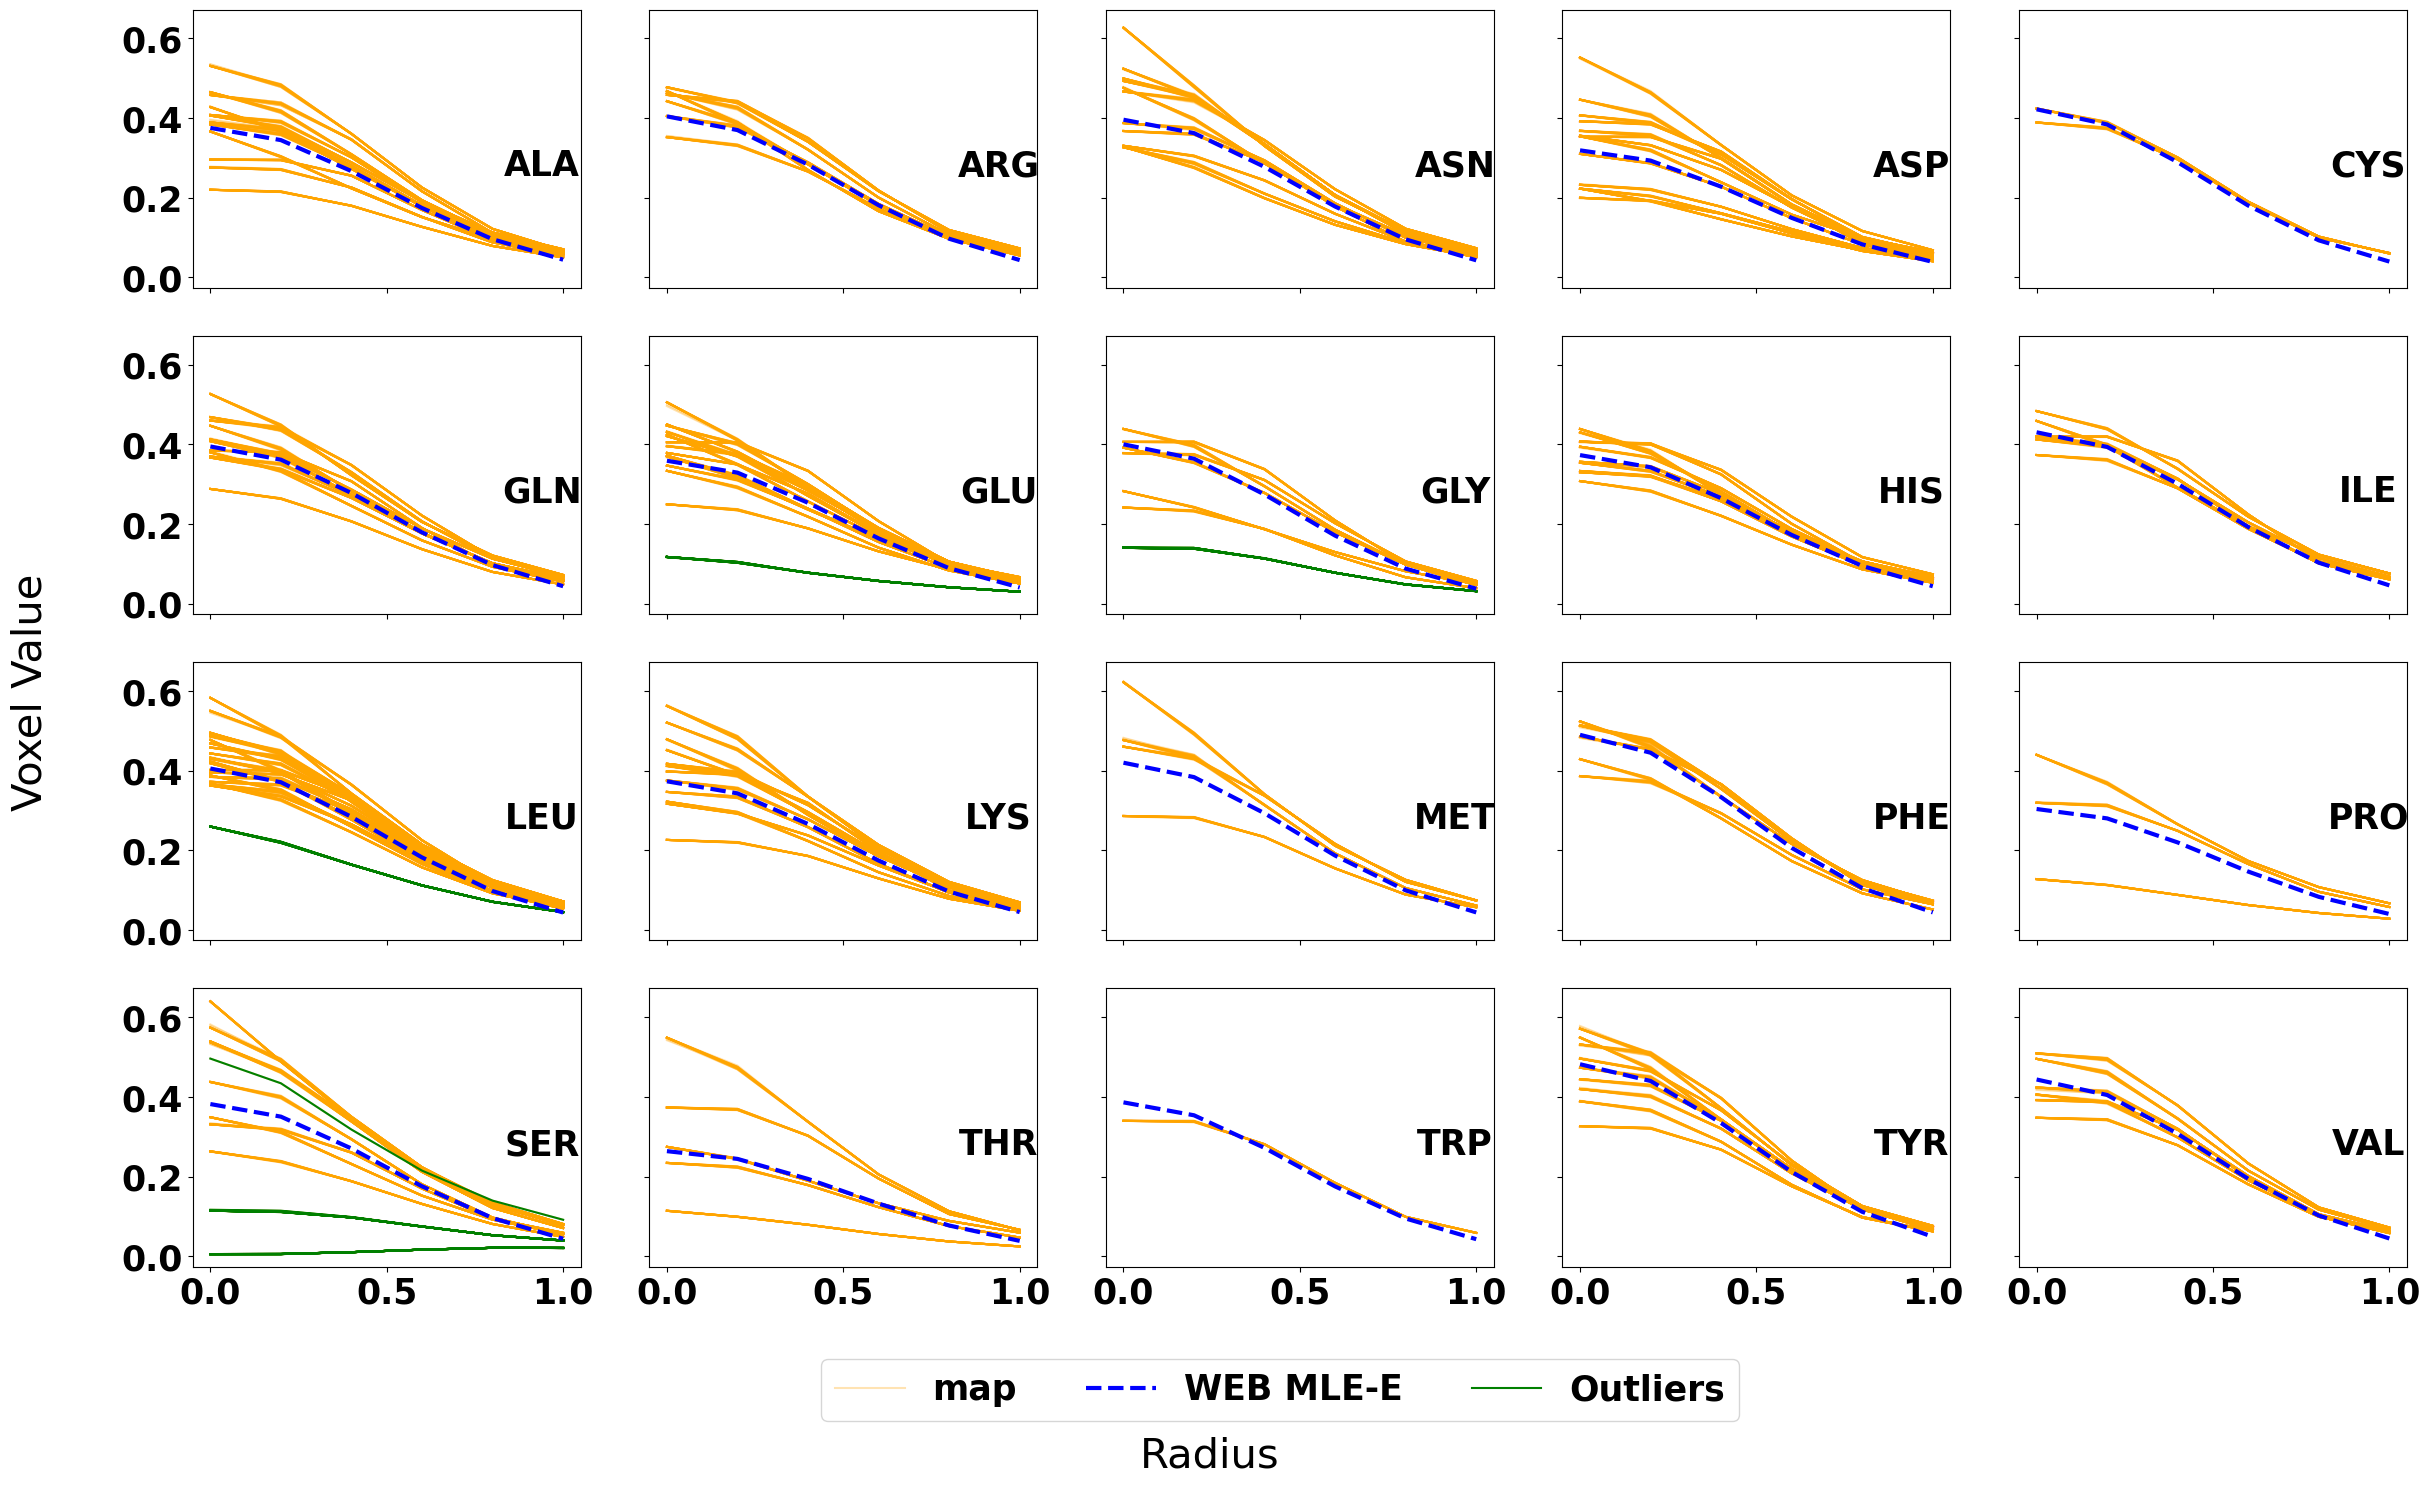

In [11]:
web.outliers_density_plot(f"./figures/outliers_density_plot_{PROTEIN}_{EM_MAP}")

In [17]:
web.lambdas

{'ALA': array([1.5346144 , 2.74254575, 2.0430886 , 2.23438536, 2.21356175,
        2.24197965, 1.71818663, 2.66662899, 2.1339073 , 2.82800385,
        3.17021059, 2.3941823 , 1.47796402, 2.67583481, 1.9550317 ,
        2.1149466 , 2.0846982 , 2.25282068, 1.64876145, 2.77618925,
        2.13738015, 2.78615438, 2.90085492, 2.36038796, 1.5151943 ,
        2.59889876, 1.9905105 , 2.13438878, 2.32335866, 2.25982616,
        1.60906723, 2.69077851, 2.04506563, 2.63837212, 2.93154473,
        2.34632695, 1.57881258, 2.67104154, 1.97670757, 2.16864107,
        2.20482413, 2.27679617, 1.54800393, 2.69100997, 2.05463755,
        2.58161464, 3.01729534, 2.33820979, 1.50306827, 2.70187594,
        2.06015959, 2.00549203, 2.16443585, 2.36789377, 1.64135081,
        2.7570622 , 1.9724243 , 2.77363004, 2.98530335, 2.29130327,
        1.51815402, 2.777469  , 2.05657976, 2.07674608, 2.13054889,
        2.47300222, 1.64590405, 2.76770571, 2.08908306, 2.71676278,
        3.07596893, 2.31453039, 1.5728851